## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [8]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 6)
X_train = training_set.iloc[:, [0,1,2,3]].values
y_train = training_set.iloc[:, 4].values
test_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 7, 12)
X_test = test_set.iloc[:, [0,1,2,3]].values
y_test = test_set.iloc[:, 4].values

## Training the Random Forest Regression model

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

## Predicting the Test set results on independent test set

In [10]:
y_pred = regressor.predict(X_test)

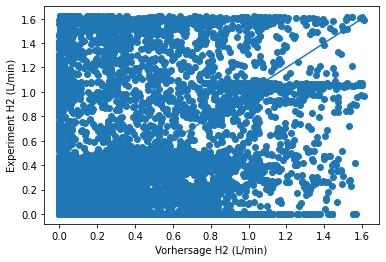

In [15]:
plt.scatter(y_pred, y_test)
plt.xlabel("Vorhersage H2 (L/min)")
plt.ylabel("Experiment H2 (L/min)")
plt.plot([0, 1.6], [0, 1.6])
plt.show()

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.11329244580201425

In [14]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.40644303852693764


In [10]:
np.savetxt("train1test1.txt", y_test)

In [13]:
ascii.write([y_test, y_pred], 'train1test1.dat', names=['y_test', 'y_pred'], overwrite=True)